# Below cell considers true positives


Dataset loaded successfully.
cause: 188, associate: 88
Filtered values - cause: 143, associate: 46

P-value: 2.7683964974902792e-05
There is a significant difference between associate_syn_imp_sc and cause_syn_imp_sc.

Generating box plot...


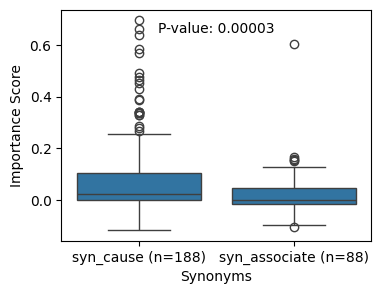

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu


def analyze_datasets(file_path_cred):
    data_cred = pd.read_csv(file_path_cred, delimiter='\t')
    print("Dataset loaded successfully.")


    data_cred = data_cred[data_cred['original_prediction'] == 1]
#     print(f"Filtered data_cred shape: {data_cred.shape}")

    
    data_cred = data_cred.rename(columns={'word': 'words', 'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob', 'word': 'words'})

    # Define the two lists
    syn_cause = ['causation', 'do', 'inducer', 'induction', 'make', 'inducement', 'stimulate', 'stimulus', 'inducive', 'get',
                 'causative', 'have', 'cause', 'induce', 'stimulation', 'inducing', 'causation', 'impact', 'developement', 'get', 'make', 'case',
                 'movement', 'induce', 'stimulus', 'causal', 'crusade', 'do', 'inducer', 'inducement',
                 'causal_agent', 'campaign', 'causative', 'grounds', 'reason', 'stimulation', 'drive', 'stimulate', 
                 'causing', 'induction', 'caus', 'inducive', 'effort', 'suit', 'inducing', 'caused', 'causes']

    syn_associate = ['companionship', 'associate','associations', 'connective', 'associatory', 'fellow', 'tie_in',
                     'connexion', 'associate_degree', 'associable', 'familiar', 'affiliate',  'companion',
                     'fellowship', 'link', 'linked', 'support', 'related', 'consort', 'colligation', 'relation', 'association',
                     'comrade', 'connect', 'associative', 'linkage', 'connection', 'link_up',
                     'correlate', 'correlative', 'correlativity', 'correlated', 'correlation']

    cause_data = data_cred[data_cred['words'].isin(syn_cause)]
    associate_data = data_cred[data_cred['words'].isin(syn_associate)]
#     print(f"Filtered cause_data shape: {cause_data.shape}, associate_data shape: {associate_data.shape}")

    
    max_imp_scores_cause = cause_data.groupby(['PMID', 'words'])['importance_score'].max().reset_index()
    max_imp_scores_associate = associate_data.groupby(['PMID', 'words'])['importance_score'].max().reset_index()

    causal_score = max_imp_scores_cause.importance_score.tolist()
    associate_score = max_imp_scores_associate.importance_score.tolist()
    print(f"cause: {len(causal_score)}, associate: {len(associate_score)}")
#     print(causal_score)
#     print(associate_score)
    

    filtered_values_cause = [value for value in causal_score if value > 0]
    filtered_values_associate = [value for value in associate_score if value > 0]
    print(f"Filtered values - cause: {len(filtered_values_cause)}, associate: {len(filtered_values_associate)}")

#     stat, p_value = wilcoxon(filtered_values_associate, filtered_values_cause)
    

    stat, p_value = mannwhitneyu(causal_score, associate_score, alternative='greater')
#     stat, p_value = mannwhitneyu(filtered_values_cause, filtered_values_associate, alternative='greater')
    
    
    
    print()
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("There is a significant difference between associate_syn_imp_sc and cause_syn_imp_sc.")
    else:
        print("There is no significant difference between associate_syn_imp_sc and cause_syn_imp_sc.")
        
    print()
    combined_data = pd.DataFrame({
        'Importance Score': pd.concat([max_imp_scores_cause['importance_score'], max_imp_scores_associate['importance_score']]),
        'List': ['syn_cause (n='+str(len(causal_score))+')'] * len(max_imp_scores_cause) + ['syn_associate (n='+str(len(associate_score))+')'] * len(max_imp_scores_associate)
    })

    print("Generating box plot...")
    plt.figure(figsize=(4, 3))
    ax=sns.boxplot(x='List', y='Importance Score', data=combined_data)
    
    y_min, y_max = ax.get_ylim()
    plt.text(0.5, y_max - 0.1 * (y_max - y_min), f'P-value: {p_value:.5f}', 
         horizontalalignment='center', size='medium', color='black')

    

    plt.xlabel('Synonyms')
    plt.ylabel('Importance Score')
    plt.show()
# Example usage
# file_path_cred = 'word_importance_score_cred_withpred_train.tsv'
# file_path_cred = '../CRED_application/bioinfo_submssion/word_importance_score_cred_withpred_train_svm.tsv'
file_path_cred = '../CRED_application/new_formula/word_importance_score_cred_withpred_train_svm.tsv'
analyze_datasets(file_path_cred)


Dataset loaded successfully.
cause: 141, associate: 73
Filtered values - cause: 67, associate: 30

P-value: 0.10014002525942883
There is no significant difference between associate_syn_imp_sc and cause_syn_imp_sc.

Generating box plot...


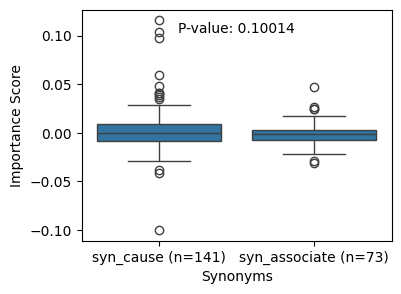

In [27]:
# file_path_cdr = 'word_importance_score_cdr_withpred_train.tsv'
file_path_cdr ='../CRED_application/new_formula/word_importance_score_cdr_withpred_train_svm.tsv'
analyze_datasets(file_path_cdr)

Dataset loaded successfully.
cause: 188, associate: 88
Filtered values - cause: 177, associate: 87

P-value: 0.4094440536446979
There is no significant difference between associate_syn_imp_sc and cause_syn_imp_sc.

Generating box plot...


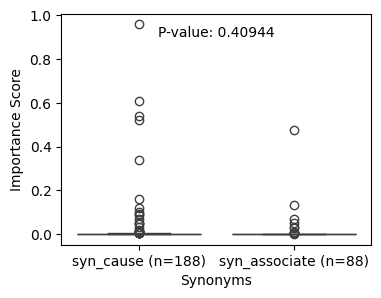

In [37]:
# file_path_cred_xgb = 'word_importance_score_cred_withpred_traindata_xgb.tsv'
file_path_cred_xgb ='../CRED_application/new_formula/word_importance_score_cred_withpred_train_xgb.tsv'

analyze_datasets(file_path_cred_xgb)

Dataset loaded successfully.
cause: 27, associate: 19
Filtered values - cause: 22, associate: 14

P-value: 0.9166997446899513
There is no significant difference between associate_syn_imp_sc and cause_syn_imp_sc.

Generating box plot...


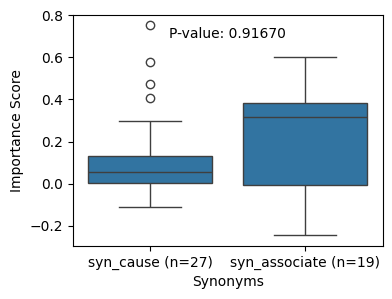

In [38]:
# file_path_cdr_xgb = 'word_importance_score_cdr_withpred_traindata_xgb.tsv'
file_path_cdr_xgb ='../CRED_application/new_formula/word_importance_score_cdr_withpred_train_xgb.tsv'

analyze_datasets(file_path_cdr_xgb)

# Top 25 Words

Index(['PMID', 'geneid', 'diseaseid', 'word', 'importance_score',
       'org_prob_score', 'perturbed_prob_score', 'original_prediction'],
      dtype='object')
Index(['PMID', 'geneid', 'diseaseid', 'word', 'importance_score',
       'org_prob_score', 'perturbed_prob_score', 'original_prediction'],
      dtype='object')


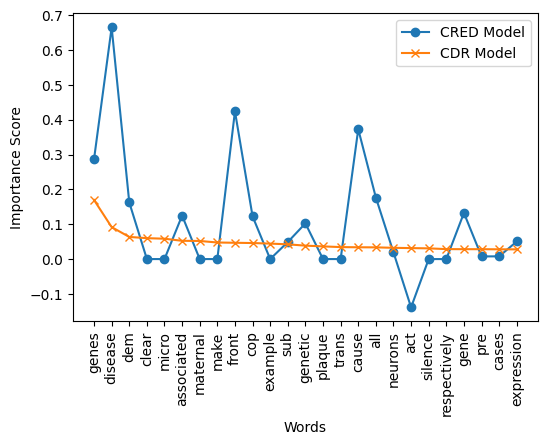

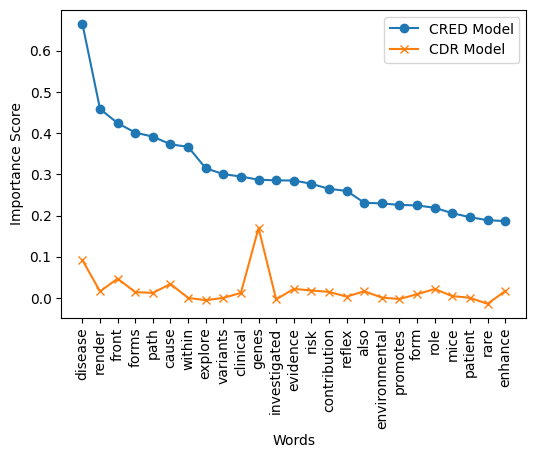

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_sort_data(file_path_cred, file_path_cdr):
    data_cred = pd.read_csv(file_path_cred,delimiter='\t')
    data_cdr = pd.read_csv(file_path_cdr,delimiter='\t')
    print(data_cred.columns)
    print(data_cdr.columns)
    sorted_data_cred = data_cred.sort_values(by='importance_score', ascending=False)
    sorted_data_cdr = data_cdr.sort_values(by='importance_score', ascending=False)
    
    sorted_data_cred = sorted_data_cred.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'word'], keep="first")
    sorted_data_cdr = sorted_data_cdr.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'word'], keep="first")
    
    sorted_data_cred = sorted_data_cred.rename(columns={'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob'})
    data_cred = data_cred.rename(columns={'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob'})
    
    return sorted_data_cred, sorted_data_cdr

def merge_and_clean_data(sorted_data_cred, sorted_data_cdr):
    merged_data = pd.merge(sorted_data_cred, sorted_data_cdr, on=['PMID', 'geneid', 'diseaseid', 'word'], suffixes=('_CRED', '_CDR'))
    merged_data_cleaned = merged_data.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'word'], keep="first")
    return merged_data_cleaned

def aggregate_data(merged_data_cleaned):
    aggregated_df = merged_data_cleaned.groupby(['word']).max().reset_index()
    return aggregated_df

def get_top_words(aggregated_df, column, top_n=25):
    aggregated_df = aggregated_df[~aggregated_df['word'].str.isdigit()]
    top_words = aggregated_df.sort_values(by=column, ascending=False).head(top_n)
    return top_words

def plot_data(data):
    # Selecting only the necessary columns for the plot
    plot_data = data[['word', 'importance_score_CRED', 'importance_score_CDR']]

    # Plotting
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 4))
    plt.plot(plot_data['word'], plot_data['importance_score_CRED'], label='CRED Model', marker='o')
    plt.plot(plot_data['word'], plot_data['importance_score_CDR'], label='CDR Model', marker='x')
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Importance Score')
    #plt.title('Top 25 Words from CRED Model and their Importance in CDR Model')
    plt.legend()
    #plt.tight_layout()
    plt.show()

# File paths for svm
# file_path_cred = '../CRED_application/bioinfo_submssion/word_importance_score_cred_withpred_test_svm.tsv'
# file_path_cdr = '../CRED_application/bioinfo_submssion/word_importance_score_cdr_withpred_test_svm.tsv'

file_path_cred = '../CRED_application/new_formula/word_importance_score_cred_withpred_test_svm.tsv'
file_path_cdr = '../CRED_application/new_formula/word_importance_score_cdr_withpred_test_svm.tsv'


# file_path_cred = '/home/ubuntu/CRED_application/word_imp_sc_new_CRED_trained_svm.tsv'
# file_path_cdr = '/home/ubuntu/bert_gt/word_imp_sc_test_data_CDR_trained.csv'

# Load and sort data
sorted_data_cred, sorted_data_cdr = load_and_sort_data(file_path_cred, file_path_cdr)

# Merge and clean data
merged_data_cleaned = merge_and_clean_data(sorted_data_cred, sorted_data_cdr)

# Aggregate data
aggregated_df = aggregate_data(merged_data_cleaned)

# Get top 25 words
top_25_words_cdr = get_top_words(aggregated_df, 'importance_score_CDR')
top_25_words_cred = get_top_words(aggregated_df, 'importance_score_CRED')
plot_data(top_25_words_cdr)
plot_data(top_25_words_cred)

# Plot top words one by one



Index(['PMID', 'geneid', 'diseaseid', 'word', 'importance_score',
       'org_prob_score', 'perturbed_prob_score', 'original_prediction'],
      dtype='object')
Index(['PMID', 'geneid', 'diseaseid', 'word', 'importance_score',
       'org_prob_score', 'perturbed_prob_score', 'original_prediction'],
      dtype='object')


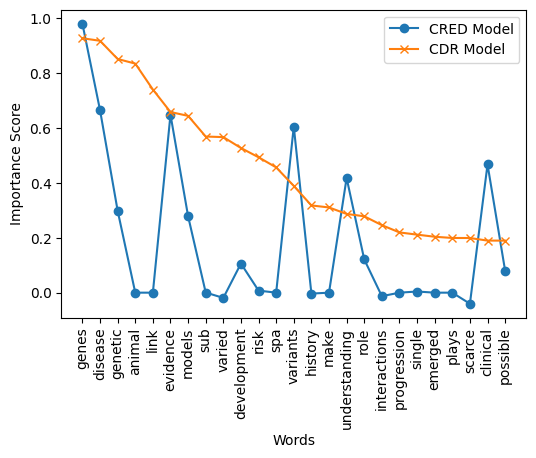

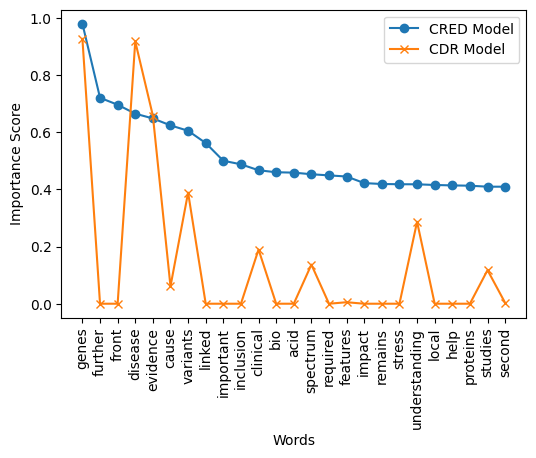

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_sort_data(file_path_cred, file_path_cdr):
    data_cred = pd.read_csv(file_path_cred,delimiter='\t')
    data_cdr = pd.read_csv(file_path_cdr,delimiter='\t')
    print(data_cred.columns)
    print(data_cdr.columns)
    sorted_data_cred = data_cred.sort_values(by='importance_score', ascending=False)
    sorted_data_cdr = data_cdr.sort_values(by='importance_score', ascending=False)
    
    sorted_data_cred = sorted_data_cred.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'word'], keep="first")
    sorted_data_cdr = sorted_data_cdr.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'word'], keep="first")
    
    sorted_data_cred = sorted_data_cred.rename(columns={'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob'})
    data_cred = data_cred.rename(columns={'perturbed_prob_score': 'perturbed_prob', 'org_prob_score': 'org_prob'})
    
    return sorted_data_cred, sorted_data_cdr

def merge_and_clean_data(sorted_data_cred, sorted_data_cdr):
    merged_data = pd.merge(sorted_data_cred, sorted_data_cdr, on=['PMID', 'geneid', 'diseaseid', 'word'], suffixes=('_CRED', '_CDR'))
    merged_data_cleaned = merged_data.drop_duplicates(subset=['PMID', 'geneid', 'diseaseid', 'word'], keep="first")
    return merged_data_cleaned

def aggregate_data(merged_data_cleaned):
    aggregated_df = merged_data_cleaned.groupby(['word']).max().reset_index()
    return aggregated_df

def get_top_words(aggregated_df, column, top_n=25):
    aggregated_df = aggregated_df[~aggregated_df['word'].str.isdigit()]
    top_words = aggregated_df.sort_values(by=column, ascending=False).head(top_n)
    return top_words

def plot_data(data):
    # Selecting only the necessary columns for the plot
    plot_data = data[['word', 'importance_score_CRED', 'importance_score_CDR']]

    # Plotting
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 4))
    plt.plot(plot_data['word'], plot_data['importance_score_CRED'], label='CRED Model', marker='o')
    plt.plot(plot_data['word'], plot_data['importance_score_CDR'], label='CDR Model', marker='x')
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Importance Score')
    #plt.title('Top 25 Words from CRED Model and their Importance in CDR Model')
    plt.legend()
    #plt.tight_layout()
    plt.show()

# File paths for svm
file_path_cred = '../CRED_application/new_formula/word_importance_score_cred_withpred_test_xgb.tsv'
file_path_cdr = '../CRED_application/new_formula/word_importance_score_cdr_withpred_test_xgb.tsv'

# file_path_cred = '/home/ubuntu/CRED_application/word_imp_sc_new_CRED_trained_svm.tsv'
# file_path_cdr = '/home/ubuntu/bert_gt/word_imp_sc_test_data_CDR_trained.csv'

# Load and sort data
sorted_data_cred, sorted_data_cdr = load_and_sort_data(file_path_cred, file_path_cdr)

# Merge and clean data
merged_data_cleaned = merge_and_clean_data(sorted_data_cred, sorted_data_cdr)

# Aggregate data
aggregated_df = aggregate_data(merged_data_cleaned)

# Get top 25 words
top_25_words_cdr = get_top_words(aggregated_df, 'importance_score_CDR')
top_25_words_cred = get_top_words(aggregated_df, 'importance_score_CRED')
plot_data(top_25_words_cdr)
plot_data(top_25_words_cred)

# Plot top words one by one



## Word cloud

In [5]:

import pandas as pd


# Load the datasets
file_path_cred_samp = '../CRED_application/new_formula/word_importance_score_sample_abstract_cred_svm.tsv'
# file_path_cdr_samp = 'word_importance_score_CDR_trained_samp_abs.tsv'
file_path_cdr_samp = '../CRED_application/new_formula/word_importance_score_sample_abstract_cdr_svm.tsv'

# # Load the datasets
# file_path_cred_samp = '/home/ubuntu/CRED_application/word_imp_sc_new_CRED_trained_sample_abstract_svm.tsv'
# # file_path_cdr_samp = 'word_importance_score_CDR_trained_samp_abs.tsv'
# file_path_cdr_samp = '/home/ubuntu/CRED_application/word_imp_sc_CDR_trained_sample_abstract_svm.tsv'

data_cred_samp = pd.read_csv(file_path_cred_samp, delimiter='\t')
data_cdr_samp = pd.read_csv(file_path_cdr_samp, delimiter='\t')

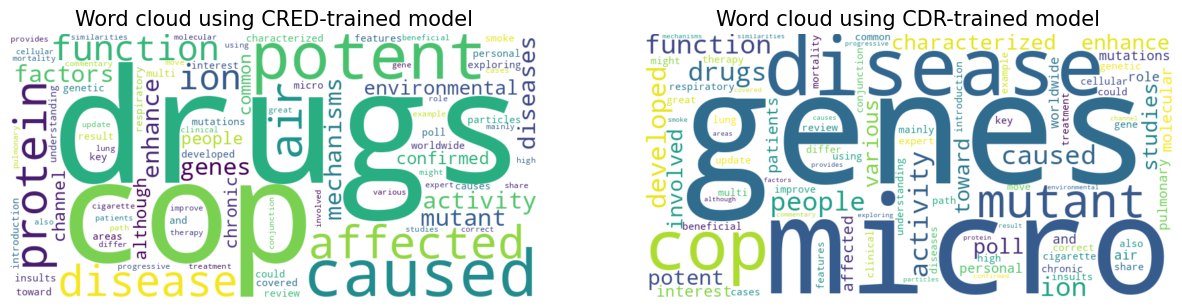

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


# Identifying the top 20 words in each dataset
cred_dict = data_cred_samp.set_index('word')['importance_score'].to_dict()
cdr_dict = data_cdr_samp.set_index('word')['importance_score'].to_dict()

abs_scores_cred = {word: abs(score)+0.5 for word, score in cred_dict.items()}
abs_scores_cdr = {word: abs(score)+0.5 for word, score in cdr_dict.items()}


# Generating word clouds with inverted scores
wordcloud_cred_inverted = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(abs_scores_cred)
wordcloud_cdr_inverted = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(abs_scores_cdr)

# Plotting the word clouds
plt.figure(figsize=(15, 7))

# Word cloud for CRED with inverted scores
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_cred_inverted, interpolation='bilinear')
plt.title('Word cloud using CRED-trained model', fontsize=15)
plt.axis('off')

# Word cloud for CDR with inverted scores
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_cdr_inverted, interpolation='bilinear')
plt.title('Word cloud using CDR-trained model', fontsize=15)
plt.axis('off')

plt.show()

